In [1]:
from game import TicTacToe
from OpenAi import get_llm_move, board_to_text
import random
import matplotlib.pyplot as plt
import numpy as np


In [6]:
def play_one_game(openAI_model, llm_symbol="O", minimax_symbol="X"):
    game = TicTacToe()
    game.load_memory()  # optional
    game.current_player = "X"  # X always starts

    while True:
        winner = game.check_winner()
        if winner is not None:
            return winner  # "X", "O", or "Draw"

        if game.current_player == minimax_symbol:
            move = game.get_best_move(minimax_symbol, llm_symbol, use_learning=True)
            game.make_move(move, minimax_symbol)
        else:
            move = get_llm_move(game, openAI_model, llm_symbol, minimax_symbol)
            if move is None:
                empties = game.get_empty_positions()
                if not empties:
                    return "Draw"
                move = random.choice(empties)
            game.make_move(move, llm_symbol)





In [ ]:
def run_match(num_games=10, openAI_model="gpt-4o-mini"):
    scores = {"LLM": {"X": 0, "O": 0}, "Minimax": {"X": 0, "O": 0}, "Draw": 0}
    
    for i in range(num_games):
        if i % 2 == 0:
            llm_symbol, minimax_symbol = "O", "X"
        else:
            llm_symbol, minimax_symbol = "X", "O"
        result = play_one_game(openAI_model, llm_symbol=llm_symbol, minimax_symbol=minimax_symbol)
        if result == llm_symbol:
            scores["LLM"][llm_symbol] += 1
            print(f"Game {i+1}: LLM wins as {llm_symbol}")
        elif result == minimax_symbol:
            scores["Minimax"][minimax_symbol] += 1
            print(f"Game {i+1}: Minimax wins as {minimax_symbol}")
        else:
            scores["Draw"] += 1
            print(f"Game {i+1}: Draw")
    
    print("\nFinal scores after", num_games, "games:")
    print("LLM as X:", scores["LLM"]["X"])
    print("LLM as O:", scores["LLM"]["O"])
    print("Minimax as X:", scores["Minimax"]["X"])
    print("Minimax as O:", scores["Minimax"]["O"])
    print("Draws:", scores["Draw"])
    
    # Visualization Bar Chart 
    fig, ax = plt.subplots(figsize=(12, 7))
    
    categories = ['LLM-X', 'LLM-O', 'Minimax-X', 'Minimax-O', 'Draws']
    values = [scores["LLM"]["X"], scores["LLM"]["O"], 
              scores["Minimax"]["X"], scores["Minimax"]["O"], 
              scores["Draw"]]
    
    colors = ['#1f77b4', '#aec7e8', '#d62728', '#ff9896', '#F39C12']
    
    bars = ax.bar(categories, values, color=colors, edgecolor='black', linewidth=1.5)
    ax.set_title(f'OpenAI {openAI_model} vs Minimax\n({num_games} Games Total)', 
                 fontsize=16, fontweight='bold', pad=20)
    ax.set_ylabel('Number of Games', fontweight='bold', fontsize=12)
    
    # Safe y-limits
    max_val = max(values) if max(values) > 0 else 1
    ax.set_ylim(0, max_val * 1.3)
    
    # Value labels on bars
    for bar, val in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + max_val*0.02, 
                f'{int(val)}', ha='center', va='bottom', 
                fontweight='bold', fontsize=14)
    
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.tick_params(axis='x', rotation=0)
    
    # Add total games text
    total_llm = sum([scores["LLM"]["X"], scores["LLM"]["O"]])
    total_minimax = sum([scores["Minimax"]["X"], scores["Minimax"]["O"]])
    ax.text(0.02, 0.98, f'LLM Win Rate: {total_llm/num_games*100:.1f}%\nMinimax Win Rate: {total_minimax/num_games*100:.1f}%', 
            transform=ax.transAxes, fontsize=12, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig(f'openai_{openAI_model}_vs_minimax.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return scores




=== GPT-4o-mini ===
Game 1: Minimax wins as X
Game 2: Minimax wins as O
Game 3: Minimax wins as X
Game 4: Minimax wins as O
Game 5: Minimax wins as X
Game 6: Minimax wins as O
Game 7: Minimax wins as X
Game 8: Minimax wins as O
Game 9: Minimax wins as X
Game 10: Minimax wins as O
Game 11: Minimax wins as X
Game 12: Minimax wins as O
Game 13: Minimax wins as X
Game 14: Minimax wins as O
Game 15: Minimax wins as X
Game 16: Draw
Game 17: Minimax wins as X
Game 18: Minimax wins as O
Game 19: Minimax wins as X
Game 20: Minimax wins as O
Game 21: Minimax wins as X
Game 22: Minimax wins as O
Game 23: Minimax wins as X
Game 24: Minimax wins as O
Game 25: Minimax wins as X
Game 26: Minimax wins as O
Game 27: Minimax wins as X
Game 28: Minimax wins as O
Game 29: Minimax wins as X
Game 30: Draw
Game 31: Minimax wins as X
Game 32: Minimax wins as O
Game 33: Minimax wins as X
Game 34: Minimax wins as O
Game 35: Minimax wins as X
Game 36: Minimax wins as O
Game 37: Minimax wins as X
Game 38: Minimax

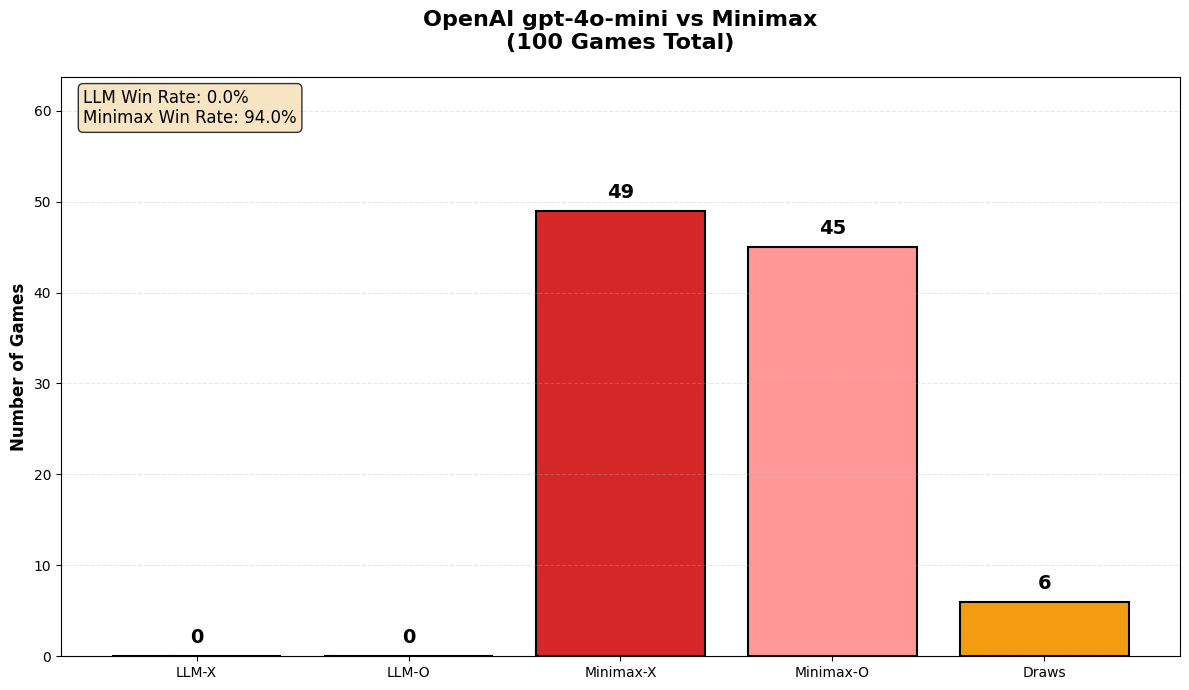

In [19]:
# Test different models:
print("=== GPT-4o-mini ===")
results_mini = run_match(100, openAI_model="gpt-4o-mini")




=== GPT-5.2 ===
Game 1: Draw
Game 2: Draw
Game 3: Draw
Game 4: Draw
Game 5: Draw
Game 6: Draw
Game 7: Draw
Game 8: Draw
Game 9: Draw
Game 10: Draw
Game 11: Draw
Game 12: Draw
Game 13: Draw
Game 14: Draw
Game 15: Draw
Game 16: Draw
Game 17: Draw
Game 18: Draw
Game 19: Draw
Game 20: Draw
Game 21: Draw
Game 22: Draw
Game 23: Draw
Game 24: Draw
Game 25: Draw
Game 26: Draw
Game 27: Draw
Game 28: Draw
Game 29: Draw
Game 30: Draw
Game 31: Draw
Game 32: Draw
Game 33: Draw
Game 34: Draw
Game 35: Draw
Game 36: Draw
Game 37: Draw
Game 38: Draw
Game 39: Draw
Game 40: Draw
Game 41: Draw
Game 42: Draw
Game 43: Draw
Game 44: Draw
Game 45: Draw
Game 46: Draw
Game 47: Draw
Game 48: Draw
Game 49: Draw
Game 50: Draw
Game 51: Draw
Game 52: Draw
Game 53: Draw
Game 54: Draw
Game 55: Draw
Game 56: Draw
Game 57: Draw
Game 58: Draw
Game 59: Draw
Game 60: Draw
Game 61: Draw
Game 62: Draw
Game 63: Draw
Game 64: Draw
Game 65: Draw
Game 66: Draw
Game 67: Draw
Game 68: Draw
Game 69: Draw
Game 70: Draw
Game 71: Dra

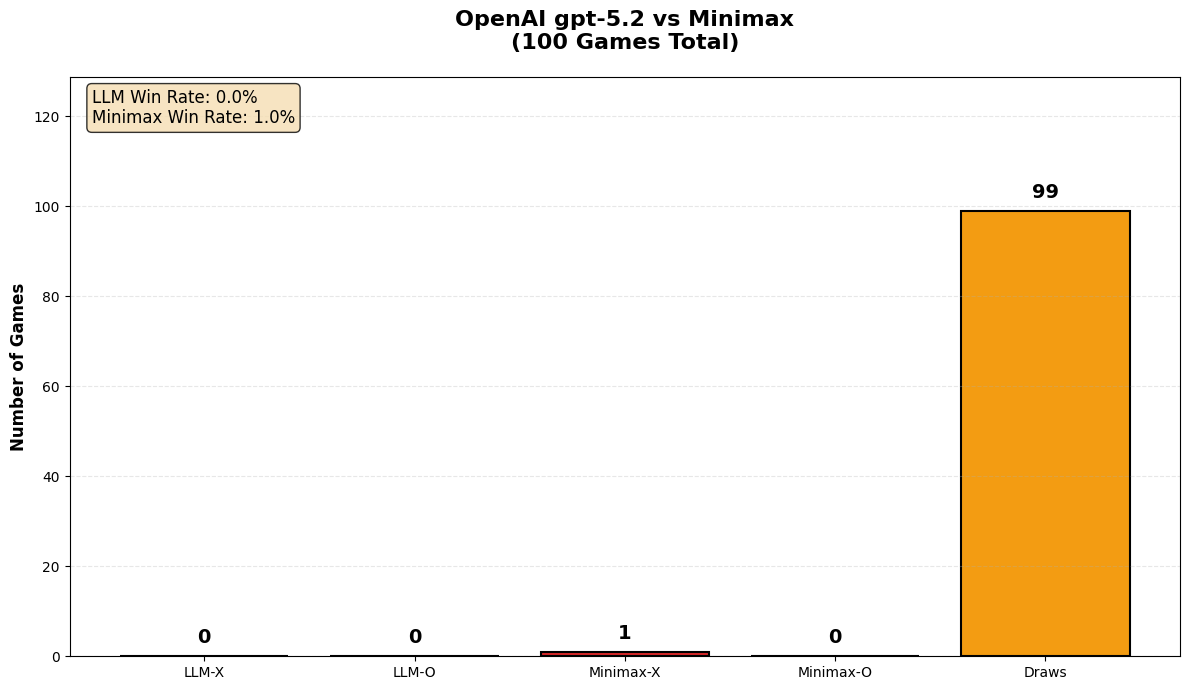

In [20]:
print("\n=== GPT-5.2 ===")
results_full = run_match(100, openAI_model="gpt-5.2")
